

```
```

## Monte Carlo DropOut como aproximación a una Red Bayesiana.

17 de mayo 2025

### OMITIR

In [ ]:
!pip install causalpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.1/252.1 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.7 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade tensorflow-probability[tf]


In [ ]:
import os
os.environ["TF_USE_LEGACY_KERAS"] = "1"


In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
print(tf.__version__, tfp.__version__)


2.18.0 0.25.0


In [1]:
# Instalación (ejecutar en una celda de Colab)
!pip install --upgrade tensorflow-probability[tf]

# Configurar Keras legacy e importar librerías (nueva celda)
import os
os.environ["TF_USE_LEGACY_KERAS"] = "1"
import tensorflow as tf
import tensorflow_probability as tfp

# Definir un modelo de red neuronal bayesiana simple
model = tf.keras.Sequential([
    tfp.layers.DenseFlipout(32, activation='relu', input_shape=(10,)),  # capa Bayesian Dense
    tfp.layers.DenseFlipout(1)  # capa Bayesian de salida
])
model.compile(optimizer='adam', loss='mse')

# Datos sintéticos para entrenamiento (1000 ejemplos, 10 features)
import numpy as np
X = np.random.rand(1000, 10).astype(np.float32)
y = X.sum(axis=1, keepdims=True).astype(np.float32)  # objetivo: suma de las 10 features (arbitrario)

# Entrenar el modelo (debería ejecutarse sin errores)
history = model.fit(X, y, epochs=5, batch_size=32)


/usr/local/lib/python3.11/dist-packages/tensorflow_probability/python/layers/util.py:99: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  loc = add_variable_fn(
/usr/local/lib/python3.11/dist-packages/tensorflow_probability/python/layers/util.py:109: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  untransformed_scale = add_variable_fn(
/usr/local/lib/python3.11/dist-packages/tf_keras/src/initializers/initializers.py:121: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/5
32/32 [==============================] - 4s 4ms/step - loss: 907.5430
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 891.3309
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 873.9587
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 858.1421
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 845.3839


In [14]:
# Instala TensorFlow Addons para tener acceso a TabNet
!pip install -q tensorflow-addons


In [16]:
!pip install -q tensorflow-text tf-models-official


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 118.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 123.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 11.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [3]:
from tensorflow_probability import layers as tfpl

### VERSION ANTERIOR (OMITIR)

In [5]:
def get_train_and_test_splits(train_size, batch_size=1):
    # Importar datos
    data = pd.read_csv("train.csv")

    # Select the required columns
    cols = [
        'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
        'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
        'EstimatedSalary', 'Exited'
    ]
    data = data[cols].copy()
    # One-hot encode the 'Geography' column
    data = pd.get_dummies(data, columns=['Geography'], prefix='Geo')

    # Convert 'Gender' to boolean.
    # Here we assume 'Male' maps to True and 'Female' to False.
    data['Gender'] = data['Gender'].apply(lambda x: True if x == 'Male' else False)

    # Convert other binary columns to boolean
    bool_cols = ['HasCrCard', 'IsActiveMember', 'Exited']
    data[bool_cols] = data[bool_cols].astype(bool)

    # Ensure 'Age' is integer type
    data['Age'] = data['Age'].astype(int)

    # Scale 'Balance' and 'EstimatedSalary' using MinMaxScaler
    scaler = MinMaxScaler()
    data[['Balance', 'EstimatedSalary']] = scaler.fit_transform(data[['Balance', 'EstimatedSalary']])

    # VARIABLE OBJETIVO Y VARIABLES INDEPENDIENTES
    features = data.drop(columns=["Exited"])
    labels = data["Exited"]

    # Convertir a tensores de TensorFlow
    features_dict = {col: tf.convert_to_tensor(features[col].values, dtype=tf.float32) for col in features.columns}
    labels_tensor = tf.convert_to_tensor(labels.values, dtype=tf.float32)

    # Crear dataset de TensorFlow
    dataset = tf.data.Dataset.from_tensor_slices((features_dict, labels_tensor))
    dataset = dataset.cache().shuffle(len(data)).prefetch(buffer_size=tf.data.AUTOTUNE)

    # Definir train_size y test_size correctamente
    test_size = len(data) - train_size  # Corregir tamaño del dataset de prueba

    train_dataset = dataset.take(train_size).batch(batch_size)
    test_dataset = dataset.skip(train_size).take(test_size).batch(batch_size)  # Agregar `take(test_size)`

    return train_dataset, test_dataset

In [6]:
hidden_units = [8, 8]
learning_rate = 0.001

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


def run_experiment(model, loss, train_dataset, test_dataset, class_weight=None):
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss=loss,
        metrics=['accuracy', tf.keras.metrics.Recall()]
    )

    print("Start training the model...")
    history = model.fit(
        train_dataset,
        epochs=num_epochs,
        validation_data=test_dataset,
        verbose=1,
        class_weight=class_weight,
        callbacks=[early_stop]
    )
    print("Model training finished.")

    print("Evaluating model performance...")
    test_loss, test_accuracy, test_recall = model.evaluate(test_dataset, verbose=1)
    print('Test Accuracy: {:.2f}%'.format(test_accuracy * 100))
    print('Test Recall: {:.2f}%'.format(test_recall * 100))

    return history

In [7]:
FEATURE_NAMES = [
    'CreditScore',
    'Gender',
    'Age',
    'Tenure',
    'Balance',
    'NumOfProducts',
    'HasCrCard',
    'IsActiveMember',
    'EstimatedSalary',
    'Geo_France',
    'Geo_Germany',
    'Geo_Spain'
]


def create_model_inputs():
    inputs = {}
    for feature_name in FEATURE_NAMES:
        inputs[feature_name] = layers.Input(
            name=feature_name, shape=(1,), dtype=tf.float32
        )
    return inputs

### Pruebas rapidas de performance modelos random

In [25]:


import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_probability as tfp

# 1) Parámetros globales
learning_rate = 1e-4
num_epochs    = 10
batch_size    = 256

# 2) Función de split (la tuya, inalterada)
from sklearn.preprocessing import MinMaxScaler

def get_train_and_test_splits(train_size, batch_size=1):
    data = pd.read_csv("train.csv")
    cols = [
        'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
        'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
        'EstimatedSalary', 'Exited'
    ]
    data = data[cols].copy()
    data = pd.get_dummies(data, columns=['Geography'], prefix='Geo')
    data['Gender'] = data['Gender'].map({'Male':True,'Female':False})
    bool_cols = ['HasCrCard','IsActiveMember','Exited']
    data[bool_cols] = data[bool_cols].astype(bool)
    data['Age'] = data['Age'].astype(int)
    scaler = MinMaxScaler()
    data[['Balance','EstimatedSalary']] = scaler.fit_transform(data[['Balance','EstimatedSalary']])

    features = data.drop(columns=["Exited"])
    labels   = data["Exited"]

    features_dict = {
        col: tf.convert_to_tensor(features[col].values, dtype=tf.float32)
        for col in features.columns
    }
    labels_tensor = tf.convert_to_tensor(labels.values, dtype=tf.float32)

    dataset = tf.data.Dataset.from_tensor_slices((features_dict, labels_tensor))
    dataset = dataset.cache().shuffle(len(data)).prefetch(tf.data.AUTOTUNE)

    test_size = len(data) - train_size
    train_ds = dataset.take(train_size).batch(batch_size)
    test_ds  = dataset.skip(train_size).take(test_size).batch(batch_size)
    return train_ds, test_ds

# 3) Crear datasets y class_weight
data_full = pd.read_csv("train.csv")
pos = (data_full['Exited']==1).sum()
neg = (data_full['Exited']==0).sum()
total = pos + neg
class_weight = {
    0: (1/neg)*(total/2.0),
    1: (1/pos)*(total/2.0)
}
print(f"Class weights: {class_weight}")

dataset_size = data_full.shape[0]
train_size   = int(dataset_size * 0.85)
train_dataset, test_dataset = get_train_and_test_splits(train_size, batch_size)

# 4) Focal Loss
def make_focal_loss(alpha=0.8, gamma=2.0):
    def focal_loss(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1-1e-7)
        p_t = y_true*y_pred + (1-y_true)*(1-y_pred)
        alpha_factor     = y_true*alpha + (1-y_true)*(1-alpha)
        modulating_factor= tf.pow(1-p_t, gamma)
        loss = -alpha_factor * modulating_factor * tf.math.log(p_t)
        return tf.reduce_mean(loss)
    return focal_loss

alpha = 1.0 - np.mean(data_full['Exited'])
focal_loss_fn = make_focal_loss(alpha=alpha, gamma=2.0)

# 5) EarlyStopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)

# 6) Entradas del modelo
FEATURE_NAMES = [
    'CreditScore','Gender','Age','Tenure','Balance','NumOfProducts',
    'HasCrCard','IsActiveMember','EstimatedSalary',
    'Geo_France','Geo_Germany','Geo_Spain'
]
def create_model_inputs():
    inputs = {}
    for name in FEATURE_NAMES:
        inputs[name] = layers.Input(name=name, shape=(1,), dtype=tf.float32)
    return inputs

# 7) Función de entrenamiento
def run_experiment(model, train_ds, test_ds, class_weight=None):
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=focal_loss_fn,
        metrics=['accuracy', keras.metrics.Recall(name='recall')]
    )
    model.fit(
        train_ds,
        epochs=num_epochs,
        validation_data=test_ds,
        class_weight=class_weight,
        callbacks=[early_stop],
        verbose=1
    )
    print("\nFinal evaluation:")
    print(model.evaluate(test_ds, verbose=1))
    return

# 8) Builders de modelos

## 8.1 Baseline MLP
def create_baseline_model():
    inputs = create_model_inputs()
    x = layers.concatenate(list(inputs.values()))
    x = layers.BatchNormalization()(x)
    for units in [128,64,32,16]:
        x = layers.Dense(units, activation='relu')(x)
        x = layers.Dropout(0.5)(x)
    out = layers.Dense(1, activation='sigmoid')(x)
    return keras.Model(inputs=inputs, outputs=out, name="baseline")

## 8.2 Wide & Deep
def create_wide_deep_model():
    inputs = create_model_inputs()
    x = layers.concatenate(list(inputs.values()))
    w = layers.Dense(64, activation='relu')(x)
    w = layers.Dropout(0.3)(w)
    d = layers.Dense(128, activation='relu')(x)
    d = layers.Dropout(0.3)(d)
    d = layers.Dense(64, activation='relu')(d)
    d = layers.Dropout(0.3)(d)
    z = layers.concatenate([w, d])
    out = layers.Dense(1, activation='sigmoid')(z)
    return keras.Model(inputs=inputs, outputs=out, name="wide_deep")

## 8.3 Bayesian MC Dropout
def create_bnn_mc_dropout():
    inputs = create_model_inputs()
    x = layers.concatenate(list(inputs.values()))
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.3)(x, training=True)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dropout(0.3)(x, training=True)
    out = layers.Dense(1, activation='sigmoid')(x)
    return keras.Model(inputs=inputs, outputs=out, name="bnn_mc_dropout")

## 8.4 Bayesian Variational (DenseVariational)
def create_bnn_variational():
    tfd  = tfp.distributions
    tfpl = tfp.layers
    inputs = create_model_inputs()
    x = layers.concatenate(list(inputs.values()))
    kl_w = 1.0 / train_size
    def posterior_mean_field(kb, bs=0, dtype=None):
        n = kb + bs
        return tf.keras.Sequential([
            tfpl.VariableLayer(2*n, dtype=dtype),
            tfpl.DistributionLambda(
                lambda t: tfd.Independent(
                    tfd.Normal(loc=t[..., :n],
                               scale=1e-5+tf.nn.softplus(t[..., n:])),
                    reinterpreted_batch_ndims=1))
        ])
    def prior_trainable(kb, bs=0, dtype=None):
        n = kb + bs
        return tf.keras.Sequential([
            tfpl.DistributionLambda(
                lambda _: tfd.Independent(
                    tfd.Normal(loc=tf.zeros(n), scale=1.0),
                    reinterpreted_batch_ndims=1))
        ])
    x = tfpl.DenseVariational(
            64, make_posterior_fn=posterior_mean_field,
            make_prior_fn=prior_trainable, kl_weight=kl_w,
            activation='relu')(x)
    x = layers.Dropout(0.3)(x, training=True)
    logits = tfpl.DenseVariational(
            1, make_posterior_fn=posterior_mean_field,
            make_prior_fn=prior_trainable, kl_weight=kl_w
    )(x)
    out = layers.Activation('sigmoid')(logits)
    return keras.Model(inputs=inputs, outputs=out, name="bnn_variational")

# 9) Ejecutar todos los experimentos
model_builders = {
    "baseline":     create_baseline_model,
    "wide_deep":    create_wide_deep_model,
    "bnn_dropout":  create_bnn_mc_dropout,
    "bnn_variational": create_bnn_variational
}

for name, builder in model_builders.items():
    print(f"\n\n===== EXPERIMENTO: {name} =====")
    m = builder()
    run_experiment(m, train_dataset, test_dataset, class_weight)


Class weights: {0: np.float64(0.6341948921322236), 1: np.float64(2.362962114486985)}


===== EXPERIMENTO: baseline =====
Epoch 1/10
548/548 [==============================] - 8s 8ms/step - loss: 0.0674 - accuracy: 0.5917 - recall: 0.3923 - val_loss: 0.0568 - val_accuracy: 0.2475 - val_recall: 0.9899
Epoch 2/10
548/548 [==============================] - 5s 8ms/step - loss: 0.0582 - accuracy: 0.5182 - recall: 0.5867 - val_loss: 0.0558 - val_accuracy: 0.2641 - val_recall: 0.9916
Epoch 3/10
548/548 [==============================] - 5s 8ms/step - loss: 0.0562 - accuracy: 0.5309 - recall: 0.6564 - val_loss: 0.0533 - val_accuracy: 0.5642 - val_recall: 0.9082
Epoch 4/10
548/548 [==============================] - 5s 8ms/step - loss: 0.0544 - accuracy: 0.5963 - recall: 0.6722 - val_loss: 0.0498 - val_accuracy: 0.6930 - val_recall: 0.8200
Epoch 5/10
548/548 [==============================] - 5s 8ms/step - loss: 0.0526 - accuracy: 0.6429 - recall: 0.6899 - val_loss: 0.0481 - val_accuracy: 0.7388 

In [1]:


import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler

# ---------------------------------------
# 1) Carga y preprocesamiento
# ---------------------------------------
df = pd.read_csv("train.csv")

# Defino columnas numéricas y categóricas
num_cols = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']
cat_cols = ['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember']

# Mapear categóricas a enteros
df['Gender']    = df['Gender'].map({'Male':0,'Female':1})
df['Geography'] = df['Geography'].map({'France':0,'Spain':1,'Germany':2})
# NumOfProducts ya es [1-4], HasCrCard/IsActiveMember ya 0/1
# Convierto todo a float/int correcto
df[num_cols] = df[num_cols].astype(float)
df[cat_cols] = df[cat_cols].astype(int)
df['Exited']  = df['Exited'].astype(float)

# Escalar variables continuas
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Etiqueta y datos
y = df['Exited'].values.astype(np.float32)
X_num = df[num_cols].values.astype(np.float32)
X_cat = df[cat_cols]          .astype(np.int32)

# ---------------------------------------
# 2) Train/test split manual (85/15)
# ---------------------------------------
N = len(df)
idx = np.random.permutation(N)
train_n = int(N * 0.85)
train_idx, test_idx = idx[:train_n], idx[train_n:]

X_num_tr = X_num[train_idx]
X_num_te = X_num[test_idx]

# Diccionarios de categóricas (corregido)
X_cat_tr = { col: X_cat[col].values[train_idx] for col in cat_cols }
X_cat_te = { col: X_cat[col].values[test_idx]  for col in cat_cols }

y_tr = y[train_idx]
y_te = y[test_idx]

batch_size = 256

# Construcción de tf.data.Dataset
def make_ds(Xn, Xc, y):
    # Xn: array (n, num_features)
    # Xc: dict de arrays (n,)
    inputs = (
        Xn,
        tuple(Xc[col] for col in cat_cols)
    )
    ds = tf.data.Dataset.from_tensor_slices((inputs, y))
    return ds.shuffle(len(y)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

train_ds = make_ds(X_num_tr, X_cat_tr, y_tr)
test_ds  = make_ds(X_num_te, X_cat_te, y_te)

# ---------------------------------------
# 3) Cálculo de class_weight
# ---------------------------------------
pos = np.sum(y_tr==1.0)
neg = np.sum(y_tr==0.0)
total = pos + neg
class_weight = {
    0: (1/neg)*(total/2.0),
    1: (1/pos)*(total/2.0)
}

# ---------------------------------------
# 4) Focal Loss, callback y helper
# ---------------------------------------
def make_focal_loss(alpha=0.8, gamma=2.0):
    def focal_loss(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        p = tf.clip_by_value(y_pred, 1e-7, 1-1e-7)
        pt = y_true * p + (1-y_true)*(1-p)
        alpha_factor      = y_true*alpha + (1-y_true)*(1-alpha)
        modulating_factor = tf.pow(1-pt, gamma)
        loss = -alpha_factor * modulating_factor * tf.math.log(pt)
        return tf.reduce_mean(loss)
    return focal_loss

alpha = 1.0 - np.mean(y_tr)
focal_loss_fn = make_focal_loss(alpha=alpha, gamma=2.0)

early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=8, restore_best_weights=True
)
learning_rate = 1e-3
num_epochs    = 50

def run_experiment(model, train_ds, test_ds, cw):
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=focal_loss_fn,
        metrics=['accuracy', keras.metrics.Recall(name='recall')]
    )
    model.fit(
        train_ds,
        validation_data=test_ds,
        epochs=num_epochs,
        class_weight=cw,
        callbacks=[early_stop],
        verbose=2
    )
    print("Final eval:", model.evaluate(test_ds, verbose=1))

# ---------------------------------------
# 5) Definición de entradas y embeddings
# ---------------------------------------
# Entrada numérica
num_input = layers.Input(shape=(len(num_cols),), name="num_input")
# Entradas categóricas
cat_inputs = {
    col: layers.Input(shape=(), dtype='int32', name=col)
    for col in cat_cols
}

# Función que crea embeddings y concatena
def embed_and_concat():
    emb_list = []
    # Geography: 3 valores → embedding dim 2
    emb_list.append(layers.Embedding(input_dim=3, output_dim=2)(cat_inputs['Geography']))
    # Gender: 2 valores → dim 1
    emb_list.append(layers.Embedding(input_dim=2, output_dim=1)(cat_inputs['Gender']))
    # NumOfProducts: 5 posibles (0–4) → dim 2
    emb_list.append(layers.Embedding(input_dim=5, output_dim=2)(cat_inputs['NumOfProducts']))
    # HasCrCard, IsActiveMember: 2 valores cada uno → dim 1
    emb_list.append(layers.Embedding(input_dim=2, output_dim=1)(cat_inputs['HasCrCard']))
    emb_list.append(layers.Embedding(input_dim=2, output_dim=1)(cat_inputs['IsActiveMember']))

    # Aplanar cada embedding
    emb_list = [layers.Flatten()(e) for e in emb_list]
    # Concatenar numéricas + embeddings
    return layers.concatenate([num_input] + emb_list)

# ---------------------------------------
# 6) Modelos
# ---------------------------------------
# 6.1 Embedding + MLP
def build_embedding_mlp():
    x = embed_and_concat()
    for units in [128, 64, 32]:
        x = layers.Dense(units, activation='relu')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.3)(x)
    out = layers.Dense(1, activation='sigmoid')(x)
    return keras.Model(
        inputs=[num_input] + list(cat_inputs.values()),
        outputs=out,
        name="emb_mlp"
    )

# 6.2 Embedding + MC Dropout (approx bayesiano)
def build_embedding_mc_dropout():
    x = embed_and_concat()
    for units in [128, 64, 32]:
        x = layers.Dense(units, activation='relu')(x)
        x = layers.Dropout(0.3)(x, training=True)  # MC Dropout activo
    out = layers.Dense(1, activation='sigmoid')(x)
    return keras.Model(
        inputs=[num_input] + list(cat_inputs.values()),
        outputs=out,
        name="emb_mc_dropout"
    )

# ---------------------------------------
# 7) Ejecutar experimentos
# ---------------------------------------
models = {
    "emb_mlp":        build_embedding_mlp,
    "emb_mc_dropout": build_embedding_mc_dropout
}

for name, builder in models.items():
    print(f"\n=== EXPERIMENTO: {name} ===")
    m = builder()
    run_experiment(m, train_ds, test_ds, class_weight)



=== EXPERIMENTO: emb_mlp ===
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['num_input', 'Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
Received: inputs=('Tensor(shape=(None, 5))', ('Tensor(shape=(None,))', 'Tensor(shape=(None,))', 'Tensor(shape=(None,))', 'Tensor(shape=(None,))', 'Tensor(shape=(None,))'))
  warnings.warn(msg)


548/548 - 15s - 27ms/step - accuracy: 0.7053 - loss: 0.0570 - recall: 0.7524 - val_accuracy: 0.8122 - val_loss: 0.0403 - val_recall: 0.7438
Epoch 2/50
548/548 - 3s - 5ms/step - accuracy: 0.7818 - loss: 0.0405 - recall: 0.7930 - val_accuracy: 0.7963 - val_loss: 0.0384 - val_recall: 0.7852
Epoch 3/50
548/548 - 3s - 5ms/step - accuracy: 0.7927 - loss: 0.0393 - recall: 0.7879 - val_accuracy: 0.7952 - val_loss: 0.0381 - val_recall: 0.7882
Epoch 4/50
548/548 - 3s - 5ms/step - accuracy: 0.7966 - loss: 0.0387 - recall: 0.7943 - val_accuracy: 0.8030 - val_loss: 0.0379 - val_recall: 0.7812
Epoch 5/50
548/548 - 3s - 5ms/step - accuracy: 0.8003 - loss: 0.0383 - recall: 0.7923 - val_accuracy: 0.8058 - val_loss: 0.0377 - val_recall: 0.7810
Epoch 6/50
548/548 - 3s - 5ms/step - accuracy: 0.8005 - loss: 0.0380 - recall: 0.7943 - val_accuracy: 0.8166 - val_loss: 0.0375 - val_recall: 0.7608
Epoch 7/50
548/548 - 3s - 5ms/step - accuracy: 0.8034 - loss: 0.0379 - recall: 0.7921 - val_accuracy: 0.8114 - val_

### AQUI EMPIEZA LA VERDADERA COMPARACIÓN: BASE Vs MC DropOut

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ---------------------------------------
# 1) Carga y preprocesamiento
df = pd.read_csv("train.csv")

num_cols = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']
cat_cols = ['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember']

# Mapear categóricas a enteros
df['Gender']    = df['Gender'].map({'Male':0,'Female':1})
df['Geography'] = df['Geography'].map({'France':0,'Spain':1,'Germany':2})

# Tipos y escalado
df[num_cols] = df[num_cols].astype(float)
df[cat_cols] = df[cat_cols].astype(int)
df['Exited']  = df['Exited'].astype(int)
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Target y features numéricas/categóricas
y = df['Exited'].values.astype(np.float32)
X_num = df[num_cols]
X_cat = df[cat_cols]

# ---------------------------------------
# 2) Cálculo de Information Value (IV)
def calculate_iv(df, feature, target, bins=10):
    working = df[[feature, target]].copy()
    if feature in cat_cols:
        working['grp'] = working[feature]
    else:
        working['grp'] = pd.qcut(working[feature], bins, duplicates='drop')
    summary = working.groupby('grp').agg({target:['sum','count']})
    summary.columns = ['bad','total']
    summary['good'] = summary['total'] - summary['bad']
    summary['dist_bad']  = summary['bad']  / summary['bad'].sum()
    summary['dist_good'] = summary['good'] / summary['good'].sum()
    summary['woe'] = np.log(summary['dist_good'] / summary['dist_bad']).replace([np.inf,-np.inf],0)
    summary['iv']  = (summary['dist_good'] - summary['dist_bad']) * summary['woe']
    return summary['iv'].sum()

iv_values = {col: calculate_iv(df, col, 'Exited') for col in num_cols + cat_cols}
iv_series = pd.Series(iv_values).sort_values(ascending=False)
print("IV por variable:\n", iv_series)

# Selección numérica por IV
high_num = [c for c in num_cols if iv_series[c] >= 0.05]
low_num  = [c for c in num_cols if iv_series[c] <  0.05]

# ---------------------------------------
# 3) División train/test (estratificado)
X_num_tr, X_num_te, X_cat_tr, X_cat_te, y_tr, y_te = train_test_split(
    X_num, X_cat, y, test_size=0.15, stratify=y, random_state=42
)

# Convertir a numpy arrays
X_high_tr = X_num_tr[high_num].values.astype(np.float32)
X_low_tr  = X_num_tr[low_num].values.astype(np.float32)
X_high_te = X_num_te[high_num].values.astype(np.float32)
X_low_te  = X_num_te[low_num].values.astype(np.float32)
X_cat_tr_np = {c: X_cat_tr[c].values.astype(np.int32) for c in cat_cols}
X_cat_te_np = {c: X_cat_te[c].values.astype(np.int32) for c in cat_cols}

batch_size = 256

def make_ds(Xh, Xl, Xc, y):
    inputs = ((Xh, Xl), tuple(Xc[c] for c in cat_cols))
    return tf.data.Dataset.from_tensor_slices((inputs, y.astype(np.float32))) \
             .shuffle(len(y)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

train_ds = make_ds(X_high_tr, X_low_tr, X_cat_tr_np, y_tr)
test_ds  = make_ds(X_high_te, X_low_te, X_cat_te_np, y_te)

# ---------------------------------------
# 4) Pesos empíricos
pos = float((y_tr==1).sum())
neg = float((y_tr==0).sum())
total = pos + neg
class_weight = {0:(1/neg)*(total/2), 1:(1/pos)*(total/2)}
print("Class weight empírico:", class_weight)

# ---------------------------------------
# 5) Focal Loss y EarlyStopping
def focal_loss(alpha, gamma=2.0):
    def loss(y_true, y_pred):
        y_t = tf.cast(y_true, tf.float32)
        p = tf.clip_by_value(y_pred,1e-7,1-1e-7)
        pt = y_t*p + (1-y_t)*(1-p)
        a  = y_t*alpha + (1-y_t)*(1-alpha)
        mod = tf.pow(1-pt, gamma)
        return tf.reduce_mean(-a * mod * tf.math.log(pt))
    return loss

alpha = 1.0 - (pos/total)
focal_loss_fn = focal_loss(alpha)
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

# ---------------------------------------
# 6) Construcción de modelo con embeddings dinámicos
def build_model(use_mc_dropout=False):
    # Inputs
    inp_high = layers.Input(shape=(len(high_num),), name='num_high')
    inp_low  = layers.Input(shape=(len(low_num),), name='num_low')
    cat_inps = {c: layers.Input(shape=(), dtype='int32', name=c) for c in cat_cols}

    # Función para mapear IV a dimensión de embedding
    max_iv = iv_series.max()
    def emb_dim(iv):
        min_d, max_d = 1, 4
        return int(round(min_d + (max_d-min_d)*(iv/max_iv)))

    # Construir embeddings
    embs = []
    for c in cat_cols:
        d = emb_dim(iv_series[c])
        vn = df[c].nunique()
        e  = layers.Embedding(input_dim=vn, output_dim=d)(cat_inps[c])
        embs.append(layers.Flatten()(e))

    # Rama numérica alto IV
    x_high = inp_high
    for u in [256,128,64]:
        x_high = layers.Dense(u, activation='relu')(x_high)
        x_high = layers.Dropout(0.3)(x_high)

    # Rama numérica bajo IV
    x_low = inp_low
    for u in [32,16]:
        x_low = layers.Dense(u, activation='relu')(x_low)
        x_low = layers.Dropout(0.3)(x_low)

    # Concatenar todas las entradas
    x = layers.concatenate([x_high, x_low] + embs)
    for u in [32]:
        x = layers.Dense(u, activation='relu')(x)
        x = layers.Dropout(0.3)(x)
    out = layers.Dense(1, activation='sigmoid')(x)

    model = keras.Model(inputs=[inp_high, inp_low] + list(cat_inps.values()), outputs=out)
    return model

# ---------------------------------------
# 7) Entrenamiento y comparación
histories = {}
for name, mc in [('MLP', False), ('MC_Dropout', True)]:
    print(f"\n=== Entrenando {name} ===")
    model = build_model(use_mc_dropout=mc)
    model.compile(
        optimizer=keras.optimizers.Adam(1e-3),
        loss=focal_loss_fn,
        metrics=['accuracy', keras.metrics.Recall(name='recall')]
    )
    history = model.fit(
        train_ds,
        validation_data=test_ds,
        epochs=50,
        class_weight=class_weight,
        callbacks=[early_stop],
        verbose=2
    )
    histories[name] = history




<ipython-input-10-ccf8dc11b063>:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = working.groupby('grp').agg({target:['sum','count']})
<ipython-input-10-ccf8dc11b063>:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = working.groupby('grp').agg({target:['sum','count']})
<ipython-input-10-ccf8dc11b063>:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = working.groupby('grp').agg({target:['sum',

IV por variable:
 NumOfProducts      1.194070
Age                0.918757
IsActiveMember     0.278349
Geography          0.234192
Gender             0.127865
Balance            0.111626
CreditScore        0.011803
Tenure             0.008988
EstimatedSalary    0.004989
HasCrCard          0.002888
dtype: float64
Class weight empírico: {0: 0.6341968443419684, 1: 2.36293501330728}

=== Entrenando MLP ===
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['num_high', 'num_low', 'Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
Received: inputs=(('Tensor(shape=(None, 2))', 'Tensor(shape=(None, 3))'), ('Tensor(shape=(None,))', 'Tensor(shape=(None,))', 'Tensor(shape=(None,))', 'Tensor(shape=(None,))', 'Tensor(shape=(None,))'))
  warnings.warn(msg)


548/548 - 19s - 35ms/step - accuracy: 0.7701 - loss: 0.0411 - recall: 0.7791 - val_accuracy: 0.8186 - val_loss: 0.0377 - val_recall: 0.7665
Epoch 2/50
548/548 - 3s - 6ms/step - accuracy: 0.8020 - loss: 0.0383 - recall: 0.7870 - val_accuracy: 0.8327 - val_loss: 0.0374 - val_recall: 0.7467
Epoch 3/50
548/548 - 3s - 6ms/step - accuracy: 0.8019 - loss: 0.0380 - recall: 0.7911 - val_accuracy: 0.8206 - val_loss: 0.0373 - val_recall: 0.7707
Epoch 4/50
548/548 - 3s - 6ms/step - accuracy: 0.8024 - loss: 0.0380 - recall: 0.7896 - val_accuracy: 0.8018 - val_loss: 0.0369 - val_recall: 0.8083
Epoch 5/50
548/548 - 3s - 5ms/step - accuracy: 0.8042 - loss: 0.0379 - recall: 0.7895 - val_accuracy: 0.8118 - val_loss: 0.0369 - val_recall: 0.7908
Epoch 6/50
548/548 - 3s - 6ms/step - accuracy: 0.8033 - loss: 0.0378 - recall: 0.7930 - val_accuracy: 0.8219 - val_loss: 0.0369 - val_recall: 0.7757
Epoch 7/50
548/548 - 3s - 6ms/step - accuracy: 0.8042 - loss: 0.0378 - recall: 0.7920 - val_accuracy: 0.8109 - val_

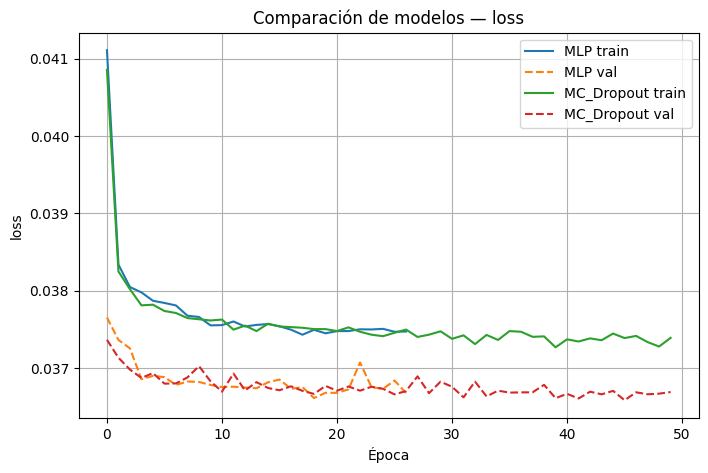

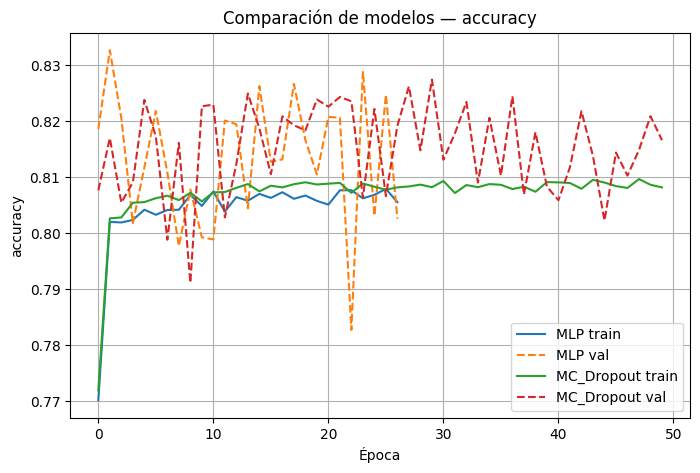

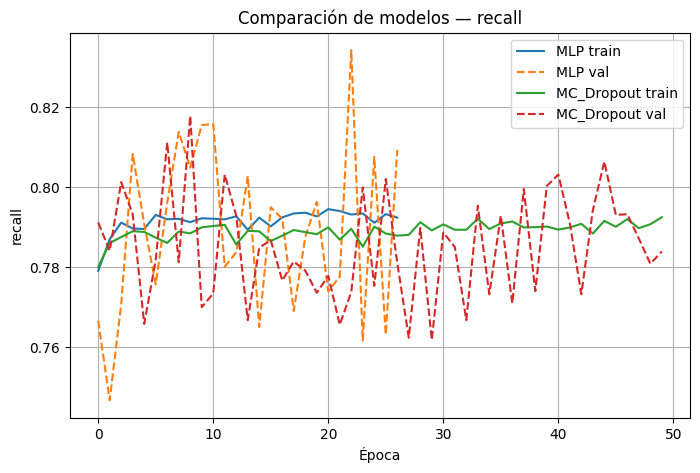

In [11]:
# 8) Gráficas comparativas
def plot_comparison(histories, metric):
    plt.figure(figsize=(8,5))
    for name, h in histories.items():
        plt.plot(h.history[metric],      label=f"{name} train")
        plt.plot(h.history[f"val_{metric}"], '--', label=f"{name} val")
    plt.title(f"Comparación de modelos — {metric}")
    plt.xlabel("Época")
    plt.ylabel(metric)
    plt.legend(); plt.grid(True); plt.show()

plot_comparison(histories, 'loss')
plot_comparison(histories, 'accuracy')
plot_comparison(histories, 'recall')


### AQUI ENTRENAMOS SOLAMENTE A MC DROPOUT

In [38]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1) Carga y preprocess
# ---------------------------------------
df = pd.read_csv("train.csv")
num_cols = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']
cat_cols = ['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember']
df['Gender']    = df['Gender'].map({'Male':0,'Female':1})
df['Geography'] = df['Geography'].map({'France':0,'Spain':1,'Germany':2})
df[num_cols] = df[num_cols].astype(float)
df[cat_cols] = df[cat_cols].astype(int)
df['Exited']  = df['Exited'].astype(int)
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
y = df['Exited'].values.astype(np.float32)

# 2) IV y selección numérica
# ---------------------------------------
def calculate_iv(df, feature, target, bins=10):
    working = df[[feature,target]].copy()
    if feature in cat_cols:
        working['grp']=working[feature]
    else:
        working['grp']=pd.qcut(working[feature],bins,duplicates='drop')
    summary=working.groupby('grp').agg({target:['sum','count']})
    summary.columns=['bad','total']
    summary['good']=summary['total']-summary['bad']
    summary['dist_bad']=summary['bad']/summary['bad'].sum()
    summary['dist_good']=summary['good']/summary['good'].sum()
    summary['woe']=np.log(summary['dist_good']/summary['dist_bad']).replace([np.inf,-np.inf],0)
    summary['iv']=(summary['dist_good']-summary['dist_bad'])*summary['woe']
    return summary['iv'].sum()
iv_values={c:calculate_iv(df,c,'Exited') for c in num_cols+cat_cols}
iv_series=pd.Series(iv_values)
high_num=[c for c in num_cols if iv_series[c]>=0.05]
low_num=[c for c in num_cols if iv_series[c]<0.05]
print("High-IV numeric:",high_num)

# 3) Split Train/Test
# ---------------------------------------
X_high=df[high_num]; X_low=df[low_num]; X_cat_all=df[cat_cols]
Xh_tr,Xh_te,Xl_tr,Xl_te,Xcat_tr,Xcat_te,y_tr,y_te=train_test_split(
    X_high,X_low,X_cat_all,y,test_size=0.15,stratify=y,random_state=42)
Xh_tr,Xl_tr = Xh_tr.values.astype(np.float32), Xl_tr.values.astype(np.float32)
Xh_te,Xl_te = Xh_te.values.astype(np.float32), Xl_te.values.astype(np.float32)
Xcat_tr={c:Xcat_tr[c].values.astype(np.int32) for c in cat_cols}
Xcat_te={c:Xcat_te[c].values.astype(np.int32) for c in cat_cols}
batch_size=256
def make_ds(Xh,Xl,Xc,y):
    inputs=(Xh,Xl)+tuple(Xc[c] for c in cat_cols)
    return tf.data.Dataset.from_tensor_slices((inputs,y)).shuffle(len(y)).batch(batch_size).prefetch(tf.data.AUTOTUNE)
train_ds=make_ds(Xh_tr,Xl_tr,Xcat_tr,y_tr)
test_ds=make_ds(Xh_te,Xl_te,Xcat_te,y_te)

# 4) Class weight
# ---------------------------------------
pos,y_neg = y_tr.sum(),(len(y_tr)-y_tr.sum())
total=pos+y_neg
cw={0:(1/y_neg)*(total/2),1:(1/pos)*(total/2)}
print("Class weight:",cw)

# 5) Focal loss & EarlyStopping
# ---------------------------------------
def focal_loss(alpha,gamma=2.0):
    def loss(y_true,y_pred):
        y_t=tf.cast(y_true,tf.float32)
        p=tf.clip_by_value(y_pred,1e-7,1-1e-7)
        pt=y_t*p+(1-y_t)*(1-p)
        a=y_t*alpha+(1-y_t)*(1-alpha)
        mod=tf.pow(1-pt,gamma)
        return tf.reduce_mean(-a*mod*tf.math.log(pt))
    return loss
alpha=1-(pos/total)
focal_loss_fn=focal_loss(alpha)
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=8,restore_best_weights=True)

# 6) Construcción modelo con MC Dropout
def build_mc():
    inp_h=layers.Input(shape=(len(high_num),)); inp_l=layers.Input(shape=(len(low_num),))
    cat_in=[layers.Input(shape=(),dtype='int32',name=c) for c in cat_cols]
    max_iv=iv_series.max(); emb_dim=lambda iv: max(1,int(round(1+3*(iv/max_iv))))
    embs=[layers.Flatten()(layers.Embedding(df[c].nunique(),emb_dim(iv_series[c]))(ci))
          for c,ci in zip(cat_cols,cat_in)]
    xh=inp_h; xl=inp_l
    for u in [256,128,64]: xh=layers.Dropout(0.3)(layers.Dense(u,'relu')(xh),training=True)
    for u in [32,16]:   xl=layers.Dropout(0.3)(layers.Dense(u,'relu')(xl),training=True)
    x=layers.concatenate([xh,xl]+embs)
    for u in [32]: x=layers.Dropout(0.3)(layers.Dense(u,'relu')(x),training=True)
    out=layers.Dense(1,'sigmoid')(x)
    return keras.Model(inputs=[inp_h,inp_l]+cat_in,outputs=out)

# 7) Entrenar
# ---------------------------------------
mc_model=build_mc()
mc_model.compile(optimizer='adam',loss=focal_loss_fn,metrics=['accuracy',keras.metrics.Recall(name='recall')])
mc_model.fit(train_ds,validation_data=test_ds,epochs=50,class_weight=cw,callbacks=[early_stop],verbose=2)

# 8) MC inference para incertidumbre
# ---------------------------------------
N=30; all_preds=[]
for _ in range(N): all_preds.append(mc_model.predict(test_ds,verbose=0).flatten())
all_preds=np.stack(all_preds,axis=0)  # shape (N,samples)
mean_preds=all_preds.mean(0); std_preds=all_preds.std(0)

# 9) DataFrame de incertidumbre
# ---------------------------------------
df_uncert=pd.DataFrame({'mean':mean_preds,'std':std_preds,'true':y_te})
thresh=df_uncert['std'].quantile(0.9)
df_uncert['reject']=df_uncert['std']>thresh
print(df_uncert.head())

# 10) Active Learning pool
# ---------------------------------------
top_k=100; al_pool=df_uncert.nlargest(top_k,'std')
print("Top-k uncertain indices:",al_pool.index.tolist())




<ipython-input-38-eac16e467008>:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary=working.groupby('grp').agg({target:['sum','count']})
<ipython-input-38-eac16e467008>:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary=working.groupby('grp').agg({target:['sum','count']})
<ipython-input-38-eac16e467008>:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary=working.groupby('grp').agg({target:['sum','count

High-IV numeric: ['Age', 'Balance']
Class weight: {0: np.float32(0.6341968), 1: np.float32(2.362935)}
Epoch 1/50
548/548 - 17s - 31ms/step - accuracy: 0.7758 - loss: 0.0407 - recall: 0.7769 - val_accuracy: 0.8177 - val_loss: 0.0375 - val_recall: 0.7721
Epoch 2/50
548/548 - 3s - 6ms/step - accuracy: 0.8024 - loss: 0.0383 - recall: 0.7873 - val_accuracy: 0.8320 - val_loss: 0.0376 - val_recall: 0.7432
Epoch 3/50
548/548 - 3s - 6ms/step - accuracy: 0.8039 - loss: 0.0381 - recall: 0.7869 - val_accuracy: 0.8267 - val_loss: 0.0372 - val_recall: 0.7635
Epoch 4/50
548/548 - 3s - 6ms/step - accuracy: 0.8053 - loss: 0.0380 - recall: 0.7889 - val_accuracy: 0.8265 - val_loss: 0.0370 - val_recall: 0.7679
Epoch 5/50
548/548 - 3s - 6ms/step - accuracy: 0.8071 - loss: 0.0379 - recall: 0.7881 - val_accuracy: 0.8244 - val_loss: 0.0371 - val_recall: 0.7711
Epoch 6/50
548/548 - 3s - 6ms/step - accuracy: 0.8052 - loss: 0.0378 - recall: 0.7893 - val_accuracy: 0.8093 - val_loss: 0.0368 - val_recall: 0.7940
Ep

In [39]:

# 11) Guardar modelo final y resultados
mc_model.save("mc_dropout_model.keras")
df_uncert.to_csv("te_uncertainty.csv", index=False)
print("Modelo guardado como mc_dropout_model.keras")

Modelo guardado como mc_model.keras


### HACEMOS PRUEBAS GRÁFICAS PARA OBSERVAR DISCRIMINACIÓN DEL MODELO

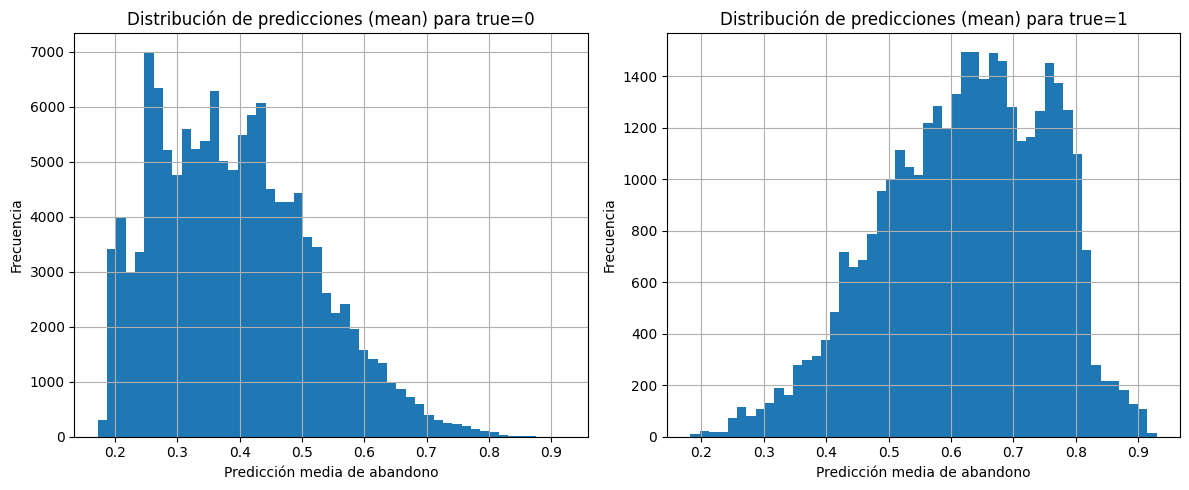

In [32]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 1) Recargar train.csv y preprocesar
df_train = pd.read_csv("train.csv")
num_cols = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']
cat_cols = ['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember']
df_train['Gender']    = df_train['Gender'].map({'Male':0,'Female':1})
df_train['Geography'] = df_train['Geography'].map({'France':0,'Spain':1,'Germany':2})
scaler = MinMaxScaler()
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

y_train = df_train['Exited'].values.astype(np.float32)

# 2) Preparar inputs para MC Dropout
high_num = ['Age','Balance']  # asegurar coincida con entrenamiento
low_num  = [c for c in num_cols if c not in high_num]

Xh_tr = df_train[high_num].values.astype(np.float32)
Xl_tr = df_train[low_num].values.astype(np.float32)
Xc_tr = {c: df_train[c].values.astype(np.int32) for c in cat_cols}

# 3) Dataset de entrenamiento para inferencia
batch_size = 256
def make_train_ds(Xh, Xl, Xc):
    inputs = (Xh, Xl) + tuple(Xc[c] for c in cat_cols)
    return tf.data.Dataset.from_tensor_slices(inputs).batch(batch_size)

train_ds_inf = make_train_ds(Xh_tr, Xl_tr, Xc_tr)

# 4) Cargar modelo MC Dropout
mc_model = keras.models.load_model("mc_dropout_model.keras", compile=False)

# 5) Inferencia MC Dropout en entrenamiento
N = 30
all_preds_tr = []
for _ in range(N):
    batch_preds = []
    for batch in train_ds_inf:
        preds_batch = mc_model(batch, training=True).numpy().flatten()
        batch_preds.append(preds_batch)
    all_preds_tr.append(np.concatenate(batch_preds, axis=0))

all_preds_tr = np.stack(all_preds_tr, axis=0)  # (N, n_train)
mean_tr = all_preds_tr.mean(axis=0)

# 6) Crear DataFrame con mean y true label
df_plot = pd.DataFrame({
    'mean_pred': mean_tr,
    'true': y_train
})

# 7) Graficar distribuciones separadas
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(df_plot[df_plot['true']==0]['mean_pred'], bins=50)
plt.title("Distribución de predicciones (mean) para true=0")
plt.xlabel("Predicción media de abandono")
plt.ylabel("Frecuencia")
plt.grid(True)

plt.subplot(1,2,2)
plt.hist(df_plot[df_plot['true']==1]['mean_pred'], bins=50)
plt.title("Distribución de predicciones (mean) para true=1")
plt.xlabel("Predicción media de abandono")
plt.ylabel("Frecuencia")
plt.grid(True)

plt.tight_layout()
plt.show()


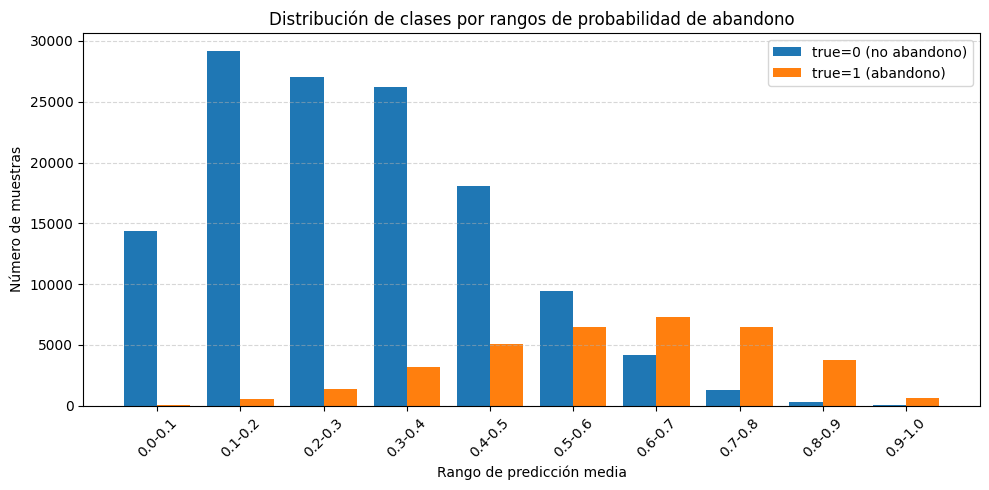

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Usamos el DataFrame df_plot que definimos antes:
# df_plot = pd.DataFrame({'mean_pred': mean_tr, 'true': y_train})

# 1) Definir bins (ejemplo: deciles)
n_bins = 10
df_plot['bin'] = pd.cut(df_plot['mean_pred'], bins=n_bins, labels=False, include_lowest=True)

# 2) Contar por bin y clase
counts = df_plot.groupby(['bin','true']).size().unstack(fill_value=0)

# 3) Gráfico de barras agrupadas
bins = [f"{i/n_bins:.1f}-{(i+1)/n_bins:.1f}" for i in range(n_bins)]

fig, ax = plt.subplots(figsize=(10,5))
width = 0.4
x = np.arange(n_bins)

ax.bar(x - width/2, counts[0], width, label='true=0 (no abandono)')
ax.bar(x + width/2, counts[1], width, label='true=1 (abandono)')

ax.set_xticks(x)
ax.set_xticklabels(bins, rotation=45)
ax.set_xlabel('Rango de predicción media')
ax.set_ylabel('Número de muestras')
ax.set_title('Distribución de clases por rangos de probabilidad de abandono')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### METEMOS EL CONJUNTO TEST PARA HACER PRUEBAS DE INCERTIDUMBRE.

In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

# 1) Carga y preprocesamiento de test.csv
df_test = pd.read_csv("test.csv")

num_cols = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']
cat_cols = ['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember']

# Mapear categóricas
df_test['Gender']    = df_test['Gender'].map({'Male':0,'Female':1})
df_test['Geography'] = df_test['Geography'].map({'France':0,'Spain':1,'Germany':2})

# Escalar continuas con el scaler entrenado
scaler = MinMaxScaler()
scaler.fit(pd.read_csv("train.csv")[num_cols])  # o carga tu scaler guardado
df_test[num_cols] = scaler.transform(df_test[num_cols])

# 2) Preparar inputs según high_num / low_num usados en entrenamiento
high_num = ['Age','Balance']            # ejemplo; usa tu propia lista
low_num  = [c for c in num_cols if c not in high_num]

Xh = df_test[high_num].values.astype(np.float32)
Xl = df_test[low_num].values.astype(np.float32)
Xc = {c: df_test[c].values.astype(np.int32) for c in cat_cols}

# 3) Crear Dataset sin etiquetas
batch_size = 256
def make_test_ds(Xh, Xl, Xc):
    inputs = (Xh, Xl) + tuple(Xc[c] for c in cat_cols)
    return tf.data.Dataset.from_tensor_slices(inputs).batch(batch_size).prefetch(tf.data.AUTOTUNE)

test_ds = make_test_ds(Xh, Xl, Xc)

# 4) Carga el modelo guardado (.keras o .h5)
mc_model = keras.models.load_model("mc_dropout_model.keras", compile=False)

# 5) Inferencia MC Dropout lote a lote para capturar incertidumbre
N = 50
all_preds = []

for i in range(N):
    preds_batches = []
    for batch in test_ds:
        # batch es un tuple: (Xh_batch, Xl_batch, cat1_batch,..., cat5_batch)
        preds_batch = mc_model(batch, training=True)             # dropout activo
        preds_batches.append(preds_batch.numpy().flatten())
    all_preds.append(np.concatenate(preds_batches, axis=0))

# Transforma a array (N, n_samples)
all_preds = np.stack(all_preds, axis=0)
mean_preds = all_preds.mean(axis=0)
std_preds  = all_preds.std(axis=0)

# 6) Adjunta resultados al DataFrame y guarda
df_out = df_test.copy()
df_out['pred_mean'] = mean_preds
df_out['pred_std']  = std_preds

df_out.to_csv("test_with_uncertainty.csv", index=False)
print(df_out[['pred_mean','pred_std']].head())


   pred_mean  pred_std
0   0.283486  0.045473
1   0.736778  0.040452
2   0.325351  0.032422
3   0.529315  0.025381
4   0.576590  0.023824


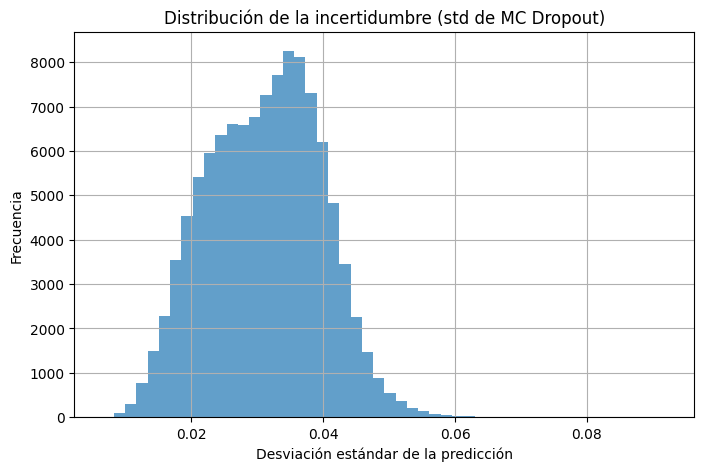

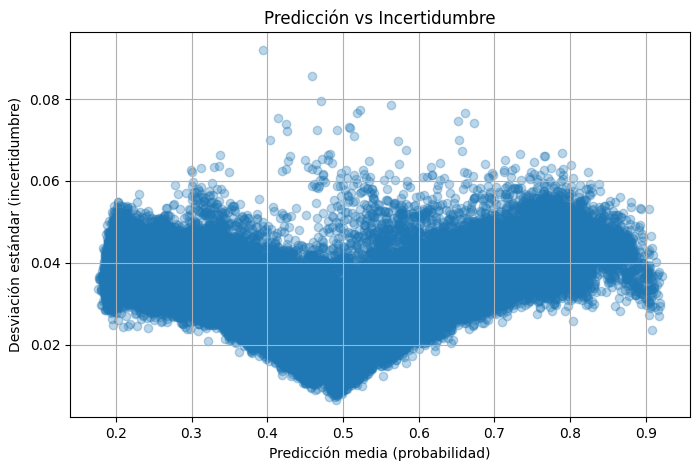

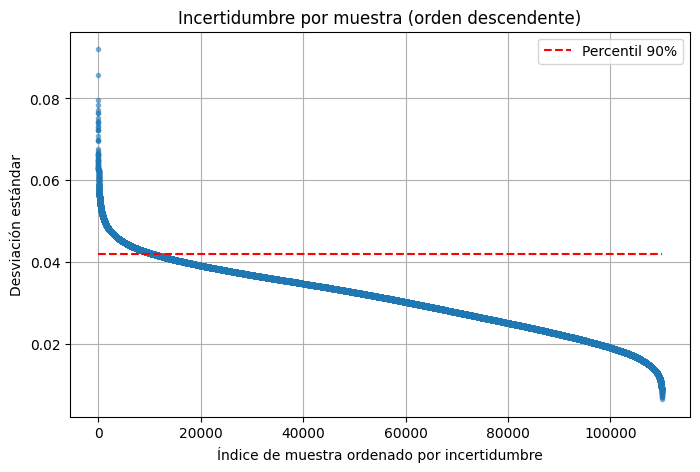

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Carga el CSV con las columnas pred_mean y pred_std
df = pd.read_csv("test_with_uncertainty.csv")

# 2) Histograma de incertidumbre
plt.figure(figsize=(8,5))
plt.hist(df['pred_std'], bins=50, alpha=0.7)
plt.title("Distribución de la incertidumbre (std de MC Dropout)")
plt.xlabel("Desviación estándar de la predicción")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

# 3) Scatter: media vs incertidumbre
plt.figure(figsize=(8,5))
plt.scatter(df['pred_mean'], df['pred_std'], alpha=0.3)
plt.title("Predicción vs Incertidumbre")
plt.xlabel("Predicción media (probabilidad)")
plt.ylabel("Desviación estándar (incertidumbre)")
plt.grid(True)
plt.show()

# 4) Ejemplo de curvas de incertidumbre ordenada
df_sorted = df.sort_values('pred_std', ascending=False).reset_index(drop=True)

plt.figure(figsize=(8,5))
plt.plot(df_sorted.index, df_sorted['pred_std'], '.', alpha=0.5)
plt.title("Incertidumbre por muestra (orden descendente)")
plt.xlabel("Índice de muestra ordenado por incertidumbre")
plt.ylabel("Desviación estándar")
plt.hlines(df['pred_std'].quantile(0.90), 0, len(df), colors='r',
           linestyles='--', label='Percentil 90%')
plt.legend()
plt.grid(True)
plt.show()


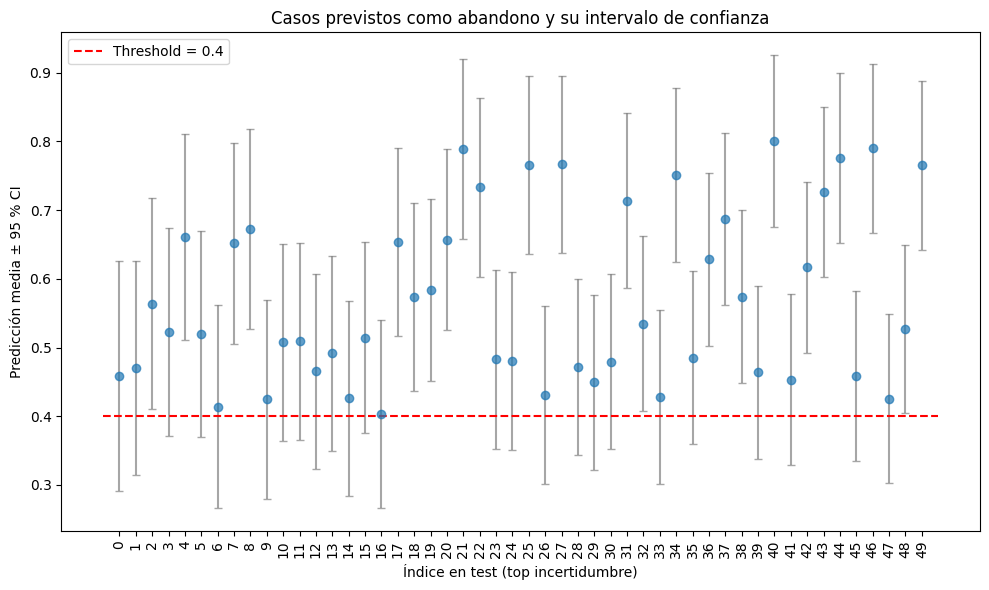

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 1) Carga los resultados
df = pd.read_csv("test_with_uncertainty.csv")

# 2) Filtrar los casos que se predicen como abandono
#    (ajusta el umbral si lo deseas)
threshold = 0.40
df_pos = df[df['pred_mean'] >= threshold].copy()

# 3) Calcular intervalos de confianza 95%
z = norm.ppf(0.975)  # ≈1.96
df_pos['ci_lower'] = df_pos['pred_mean'] - z * df_pos['pred_std']
df_pos['ci_upper'] = df_pos['pred_mean'] + z * df_pos['pred_std']

# 4) Ordenar por incertidumbre descendente (opcional)
df_pos = df_pos.sort_values('pred_std', ascending=False).reset_index(drop=True)

# 5) Gráfica de barras con errorbars
#    Mostraremos, por claridad, sólo los top 50 más inciertos
top_n = 50
sel = df_pos.iloc[:top_n]

plt.figure(figsize=(10,6))
plt.errorbar(
    x=np.arange(top_n),
    y=sel['pred_mean'],
    yerr=z * sel['pred_std'],
    fmt='o',
    ecolor='gray',
    capsize=3,
    alpha=0.7
)
plt.hlines(threshold, -1, top_n, colors='r', linestyles='--', label=f'Threshold = {threshold}')
plt.xticks(np.arange(top_n), sel.index, rotation=90)
plt.xlabel("Índice en test (top incertidumbre)")
plt.ylabel("Predicción media ± 95 % CI")
plt.title("Casos previstos como abandono y su intervalo de confianza")
plt.legend()
plt.tight_layout()
plt.show()
